In [51]:
import numpy as np
from orphics import maps, cosmology,io,stats
import matplotlib.pyplot as plt

from scipy import optimize
import cosmo_cleaner
from cosmo_cleaner import fisher as fisher,plot
import camb
from cosmo_cleaner import cosmology
from cosmo_cleaner import triangle_plot
import camb
from camb import model, initialpower

def get_der(spectra,pars,delta,cleaned=False):
    """derivative function used for fisher"""
    der_spectra_alpha = np.ones((len(list(spectra.items())[0][1]), len(spectra), len(pars)))
    for i in range(len(pars)):
        print(f"Taking field derivatives wrt {pars[i]}")
        der=cosmology.derivative_lensing(ells,1,0.5,defaultCosmology,pars[i],delta[i])
        der_spectra_alpha[:, 0, i] = der[1][:cut] #kg
        der_spectra_alpha[:, 1, i] = der[0][:cut] #gg
        if cleaned==True:
            der_spectra_alpha[:, 2, i] = der[-1][:cut]
        else:
            der_spectra_alpha[:, 2, i] = der[2][:cut] #kk
    return der_spectra_alpha
%config InlineBackend.figure_format = 'retina'


Import model with dark_energy

In [2]:
defaultCosmology = {'omch2': 0.1198
                    ,'ombh2': 0.02225
                    ,'H0': 67.3
                    ,'ns': 0.9645
                    ,'As': 2.2e-9
                    ,'mnu': 0.06
                    ,'w0': -0.9
                    ,'tau':0.06
                    ,'nnu':3.046
                    ,'wa': 0.0,'bias':1,'A_e':1.,'A_l':1.,'omega_k':0}
for i in range(17):
    defaultCosmology[f'lsst_bias{i}']=1

nz = 1000
kmax = 10
zmin = 0.
ells=np.arange(5000)

parsde = camb.CAMBparams()
parsde.set_dark_energy(w=defaultCosmology['w0'],wa = defaultCosmology['wa'], dark_energy_model = 'ppf')
parsde.set_cosmology(H0=defaultCosmology['H0'], cosmomc_theta = None,ombh2=defaultCosmology['ombh2'], 
               omch2=defaultCosmology['omch2'], mnu=defaultCosmology['mnu'], tau = defaultCosmology['tau'],
               nnu = defaultCosmology['nnu'], num_massive_neutrinos = 3)
#pars.NonLinear = model.NonLinear_both
parsde.InitPower.set_params(ns=defaultCosmology['ns'],As=defaultCosmology['As'])
resultsde = camb.get_results(parsde)
defaultde=cosmology.cosmology(nz,kmax,zmin,ells,defaultCosmology,parsde,resultsde)

In [3]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=defaultCosmology['H0'], cosmomc_theta = None,ombh2=defaultCosmology['ombh2'], 
               omch2=defaultCosmology['omch2'], mnu=defaultCosmology['mnu'], tau = defaultCosmology['tau'],
               nnu = defaultCosmology['nnu'], num_massive_neutrinos = 3)
#pars.NonLinear = model.NonLinear_both
pars.set_for_lmax(3000)
pars.InitPower.set_params(ns=defaultCosmology['ns'],As=defaultCosmology['As'])
results = camb.get_results(pars)
default=cosmology.cosmology(nz,kmax,zmin,ells,defaultCosmology,pars,results)

In [4]:
clkkt=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/clkk.txt")[:4000]


In [5]:
zmin=[0,0.01,0.02,0.1,0.15,0.2,0.3,0.35,0.4,0.45,0.5]
clkks=[]
clkkdes=[]
for i in range(len(zmin)):
    clkkdes.append(defaultde.get_clkk(zmin=zmin[i]))
    clkks.append(default.get_clkk(zmin=zmin[i]))

This shows clkk without low redshift information the ratio of clkk have better agreement between models with and without DE

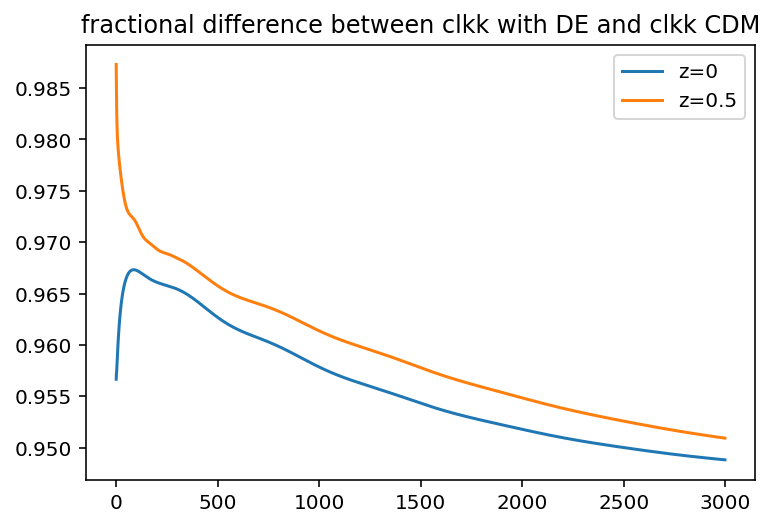

In [52]:
plt.plot(clkkdes[0]/clkks[0],label=f'z={zmin[0]}')
plt.plot(clkkdes[-1]/clkks[-1],label=f'z={zmin[-1]}')
plt.title("fractional difference between clkk with DE and clkk CDM")
plt.legend()

Ultimately lsst extends to redshift 7, clean all cmb info up to there? But lets start with a toy galaxy model and remove the clkk low redshift. Not sure what tracer to use yet but lets first set up the formalism. Purely lensing neutrino mass constraint.

In [7]:
clkk=np.loadtxt("/global/homes/j/jia_qu/so-lenspipe/data/clkk.txt")[:4000]
s4noise=np.loadtxt("/global/homes/j/jia_qu/cosmo_cleaner/cosmo_cleaner/data/nlkks4.txt")[:4000]
f_sky=0.4
ells=np.arange(len(s4noise))
lensnoise=(s4noise+clkk)**0.5/np.sqrt(f_sky*ells)

/global/homes/j/jia_qu/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


Take the derivatives wrt lensing

In [8]:
parameters = np.array( ['ombh2', 'omch2', 'H0',  'As', 'ns', 'tau', 'mnu'])
centers = np.array([0.02225,  0.1198,  67.3,  2.2e-9, 0.9645, 0.06, 0.06])
left_steps = np.array([0.0008, 0.003,   2,   0.1e-9, 0.010, 0.02, 0.0])
right_steps = np.array([0.0008, 0.003,   2,   0.1e-9, 0.010, 0.02, 0.02])
delta=[]
for i in range(len(left_steps)):
    delta.append((left_steps[i],right_steps[i]))
spectra = { 'kk': clkk[:cut]}


NameError: name 'cut' is not defined

In [ ]:
def get_der(spectra,pars,delta,cleaned=False):
    """derivative function used for fisher"""
    der_spectra_alpha = np.ones((len(list(spectra.items())[0][1]), len(spectra), len(pars)))
    for i in range(len(pars)):
        print(f"Taking field derivatives wrt {pars[i]}")
        der=cosmology.derivative_lensing(ells,1,0.5,defaultCosmology,pars[i],delta[i])
        der_spectra_alpha[:, 0, i] = der[:cut] #kg
    return der_spectra_alpha

In [25]:
der=get_der(spectra,parameters,delta,cleaned=False)

Taking field derivatives wrt ombh2
Taking field derivatives wrt omch2
Taking field derivatives wrt H0
Taking field derivatives wrt As
Taking field derivatives wrt ns
Taking field derivatives wrt tau
Taking field derivatives wrt mnu


Load the lensing fisher matrix

In [38]:
lensfisher=np.load("/global/homes/j/jia_qu/cosmo_cleaner/cosmo_cleaner/data/parshifts4fisherlensing.npy")
cmbfisher=np.load("/global/homes/j/jia_qu/cosmo_cleaner/cosmo_cleaner/data/parshifts4primary.npy")

In [40]:
lensfisher.shape

(10, 10)

In [56]:
zmin=[0,0.01,0.02,0.1,0.15,0.2,0.3,0.35,0.4,0.45,0.5]

Load the derivative and also the fisher matrices

In [12]:
der=np.load(f"/global/homes/j/jia_qu/cosmo_cleaner/cosmo_cleaner/data/derivative{zmin[0]}.npy")
fisher=np.load(f"/global/homes/j/jia_qu/cosmo_cleaner/cosmo_cleaner/data/parshiftsfisher{zmin[0]}.npy")

In [11]:
def parshift_lensing(fisher,derivative,fiducial,newcl,lmin,lmax,noise=None,f_sky=0.4):
    if noise is None:
        noise=np.zeros(len(fiducial))
    ells=np.arange(lmin,lmax)
    deltaclkk=abs(newcl-fiducial)    
    fac=deltaclkk/(fiducial+noise)**2
    var=np.nansum(fac*f_sky*(2*ells+1)*0.5*derivative,axis=2)
    bias=np.dot(np.linalg.inv(fisher),var)
    return np.transpose(bias)[0]

In [ ]:
cut=600
ells=np.arange(600)
fiducial=clkks[0][:cut]
newcl=clkkdes[0][:cut]
deltaclkk=abs(newcl-fiducial)    
fac=deltaclkk/(fiducial)**2
var=np.nansum(fac*1*(2*ells+1)*0.5*derivative,axis=2)
bias=np.dot(np.linalg.inv(fisher),var)

In [28]:
clkkde=defaultde.get_clkk(zmin=0.3)
clkk=default.get_clkk(zmin=0.3)


In [230]:
derivative=der.transpose()


In [234]:
derivative[:,:,20:300]

array([[[ 3.66782096e-07,  3.63477091e-07,  3.59426771e-07, ...,
         -6.31811718e-07, -6.30201401e-07, -6.28590570e-07]],

       [[ 8.62475853e-07,  8.83007293e-07,  9.02665321e-07, ...,
          7.62542406e-07,  7.60353635e-07,  7.58172782e-07]],

       [[-1.28462809e-09, -1.29137075e-09, -1.29720642e-09, ...,
         -4.90521051e-10, -4.88954006e-10, -4.87396503e-10]],

       ...,

       [[-4.17795892e-07, -4.15421180e-07, -4.12740258e-07, ...,
          1.97391842e-09,  2.13975682e-09,  2.30371376e-09]],

       [[-3.27812619e-10, -3.30752203e-10, -3.33217902e-10, ...,
         -8.10392029e-11, -8.07239697e-11, -8.04101449e-11]],

       [[-2.12774035e-08, -2.24003243e-08, -2.34959682e-08, ...,
         -2.36694336e-08, -2.35922831e-08, -2.35154968e-08]]])

In [338]:
derivative

array([[[ 1.64723226e-08,  1.00471533e-08,  1.86417364e-08, ...,
         -2.97205141e-07, -2.96701120e-07, -2.96198398e-07]],

       [[ 2.45844648e-10, -2.82605624e-08, -4.21929063e-08, ...,
          3.32800550e-07,  3.32139004e-07,  3.31479553e-07]],

       [[ 4.63267630e-11,  9.71667113e-11,  1.51745675e-10, ...,
         -1.84030795e-10, -1.83624871e-10, -1.83220115e-10]],

       ...,

       [[-2.70672094e-08, -8.90721936e-08, -1.28745091e-07, ...,
          1.38535492e-08,  1.38546245e-08,  1.38555979e-08]],

       [[-1.68424236e-13, -5.94598646e-12, -2.23860452e-11, ...,
         -2.94876222e-11, -2.94211238e-11, -2.93548664e-11]],

       [[ 3.86905700e-11,  1.88643445e-10,  4.79515713e-10, ...,
         -9.58508803e-09, -9.56306194e-09, -9.54111573e-09]]])

In [334]:
A = np.delete(derivative, 0, 0)

In [337]:
A

array([[[ 2.45844648e-10, -2.82605624e-08, -4.21929063e-08, ...,
          3.32800550e-07,  3.32139004e-07,  3.31479553e-07]],

       [[ 4.63267630e-11,  9.71667113e-11,  1.51745675e-10, ...,
         -1.84030795e-10, -1.83624871e-10, -1.83220115e-10]],

       [[ 2.15134568e+00,  8.37902231e+00,  1.35336369e+01, ...,
          1.09860830e+01,  1.09597661e+01,  1.09335519e+01]],

       [[-2.70672094e-08, -8.90721936e-08, -1.28745091e-07, ...,
          1.38535492e-08,  1.38546245e-08,  1.38555979e-08]],

       [[-1.68424236e-13, -5.94598646e-12, -2.23860452e-11, ...,
         -2.94876222e-11, -2.94211238e-11, -2.93548664e-11]],

       [[ 3.86905700e-11,  1.88643445e-10,  4.79515713e-10, ...,
         -9.58508803e-09, -9.56306194e-09, -9.54111573e-09]]])

In [95]:
derivative.shape

(7, 1, 600)

In [57]:
from numpy import linalg as LA
conditioning=[]
for i in range(len(clkks)):
    fisher=np.load(f"/global/homes/j/jia_qu/cosmo_cleaner/cosmo_cleaner/data/parshiftsfisher{zmin[i]}.npy")
    c=LA.cond(fisher)
    conditioning.append(c)

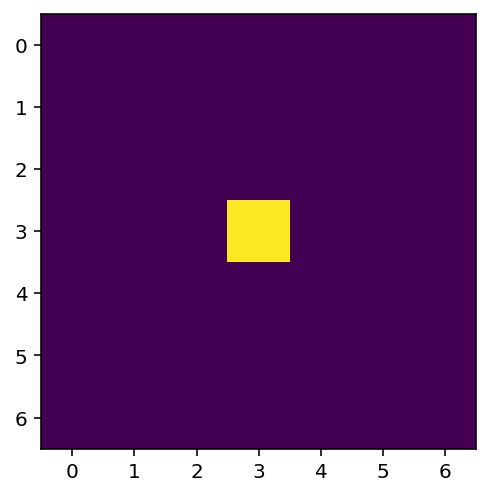

In [63]:
plt.imshow(fisher)

In [60]:
conditioning

[1.021388610739914e+28,
 1.0221521942537456e+28,
 1.039549562510331e+28,
 1.0603405678803147e+28,
 1.6102891639274811e+28,
 5.367609048721156e+27,
 3.5577558450137106e+27,
 4.2507931584639226e+27,
 4.241059472446467e+27,
 4.6485488391001624e+27,
 4.4831056918016953e+27]

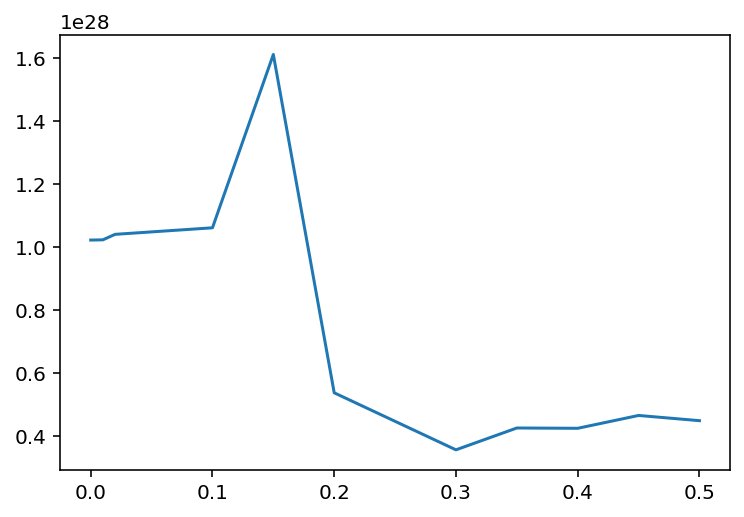

In [58]:
plt.plot(zmin,conditioning)

In [55]:
lmax=600
lmin=50
fisher=fisher
dev=[]
biases=[]
for i in range(len(clkks)):
    a=np.nansum(abs(clkks[i]-clkkdes[i]))
    dev.append(a)
    fiducial=clkks[i][lmin:lmax]
    newcl=clkkdes[i][lmin:lmax]
    der=np.load(f"/global/homes/j/jia_qu/cosmo_cleaner/cosmo_cleaner/data/derivative{zmin[i]}.npy")
    fisher=np.load(f"/global/homes/j/jia_qu/cosmo_cleaner/cosmo_cleaner/data/parshiftsfisher{zmin[i]}.npy")
    derivative=der.transpose()
    """
    A = np.delete(derivative, 2, 0)
    A = np.delete(A, -2, 0)
    A = np.delete(A, -3, 0)
    A = np.delete(A, -4, 0)
    A = np.delete(A, 0, 0)
    A = np.delete(A, 1, 0)
    B=np.delete(fisher,2,0)
    B=np.delete(B,2,1)
    B=np.delete(B,-2,0)
    B=np.delete(B,-2,1)
    B=np.delete(B,-3,0)
    B=np.delete(B,-3,1)
    B=np.delete(B,-4,0)
    B=np.delete(B,-4,1)
    B=np.delete(B,0,1)
    B=np.delete(B,0,0)
    B=np.delete(B,1,1)
    B=np.delete(B,1,0)
    """ 

    #bias=parshift_lensing(B,A[:,:,lmin:lmax],fiducial,newcl,lmin,lmax,noise=None,f_sky=0.4)
    bias=parshift_lensing(fisher,derivative[:,:,lmin:lmax],fiducial,newcl,lmin,lmax,noise=None,f_sky=0.4)
    biases.append(bias)

In [56]:
fisher

array([[ 2.03435099e+07, -2.36547175e+07,  1.31656534e+04,
        -8.56346701e+14, -4.94286972e+05,  2.31236680e+03,
         7.21068532e+05],
       [-2.36547175e+07,  2.77413273e+07, -1.54480971e+04,
         1.01819694e+15,  5.05062566e+05, -2.75747005e+03,
        -8.49664854e+05],
       [ 1.31656534e+04, -1.54480971e+04,  8.60750002e+00,
        -5.66967998e+11, -2.81812058e+02,  1.53542052e+00,
         4.73304881e+02],
       [-8.56346701e+14,  1.01819694e+15, -5.66967998e+11,
         3.82844076e+22,  1.34540661e+13, -1.04203049e+11,
        -3.14546812e+13],
       [-4.94286972e+05,  5.05062566e+05, -2.81812058e+02,
         1.34540661e+13,  3.78854556e+04, -3.35497877e+01,
        -1.39232422e+04],
       [ 2.31236680e+03, -2.75747005e+03,  1.53542052e+00,
        -1.04203049e+11, -3.35497877e+01,  2.83932370e-01,
         8.53369246e+01],
       [ 7.21068532e+05, -8.49664854e+05,  4.73304881e+02,
        -3.14546812e+13, -1.39232422e+04,  8.53369246e+01,
         2.6120287

Text(0.5, 0, 'z_min')

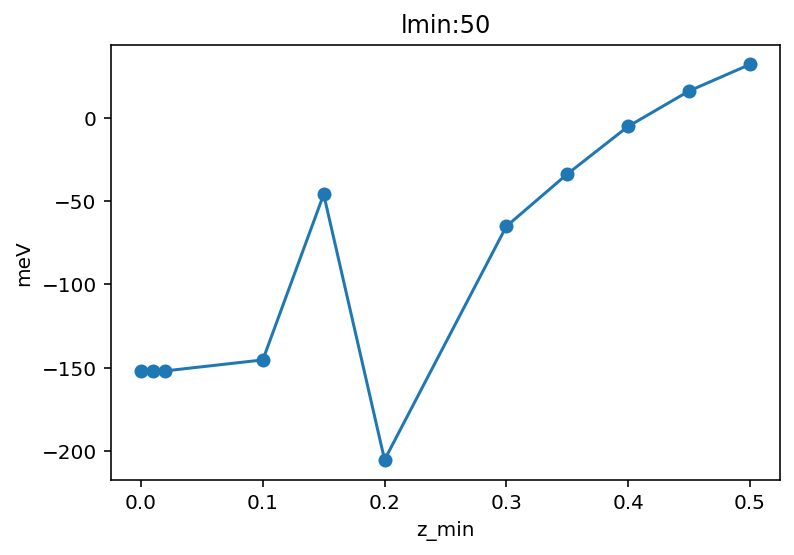

In [53]:
mnubias=[]
w0bias=[]
for i in range(len(clkks)):
    mnubias.append((biases[i][-1]*1000))
plt.plot(zmin,mnubias,'-o')
plt.title(f"lmin:{lmin}")
plt.ylabel('meV')
plt.xlabel('z_min')


In [17]:
ders=[]
for i in range(len(clkks)):
    der=np.load(f"/global/homes/j/jia_qu/cosmo_cleaner/cosmo_cleaner/data/derivative{zmin[i]}.npy")
    ders.append(der[:,0,-7])

In [18]:
k=-1
fishcol=[]
for i in range(len(clkks)):
    fisher=np.load(f"/global/homes/j/jia_qu/cosmo_cleaner/cosmo_cleaner/data/parshiftsfisher{zmin[i]}.npy")
    fishcol.append(np.linalg.inv(fisher)[k][k])
fishcol=np.array(fishcol)

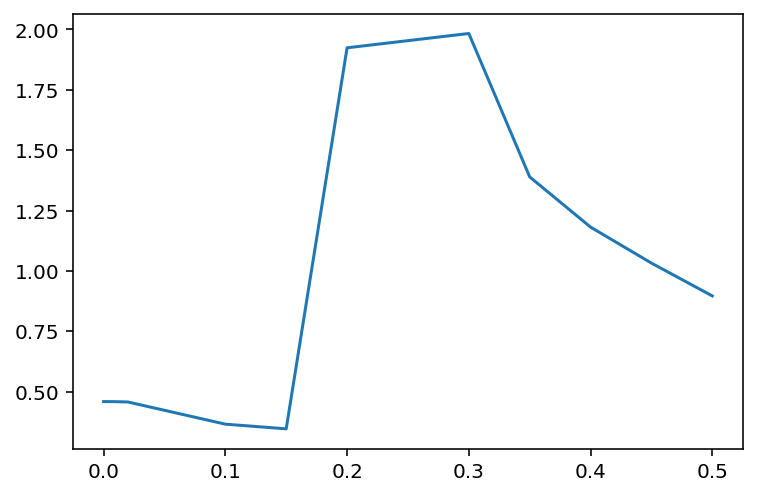

In [19]:
plt.plot(zmin,fishcol)

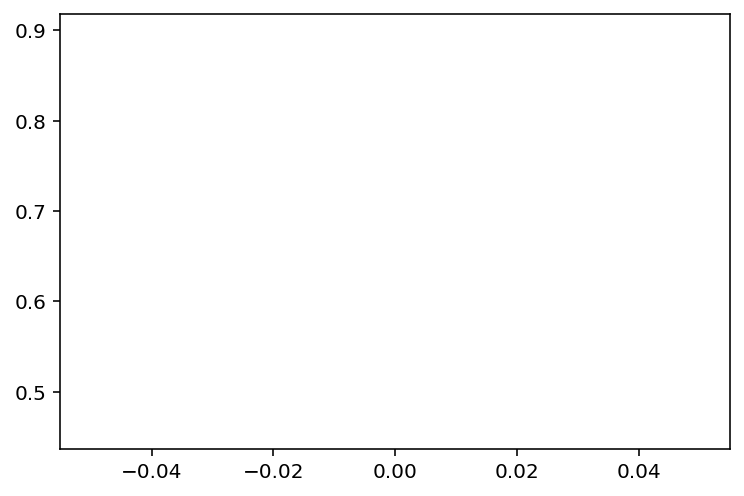

In [20]:
plt.plot(fishcol[0])
plt.plot(fishcol[10])

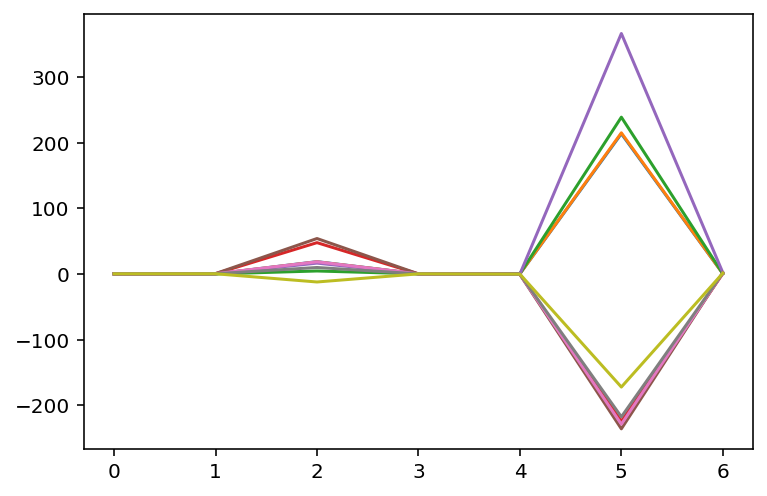

In [328]:
for i in range(1,10):
    plt.plot((fishcol[i]))

In [15]:
mnubias=[]
w0bias=[]
for i in range(len(clkks)):
    mnubias.append((biases[i][0]*1000))
plt.plot(zmin,mnubias,'-o')
plt.ylabel('meV')
plt.xlabel('z_min')

In [17]:
#check stability of derivatives
defaultCosmology

{'omch2': 0.1198,
 'ombh2': 0.02225,
 'H0': 67.3,
 'ns': 0.9645,
 'As': 2.2e-09,
 'mnu': 0.06,
 'w0': -0.9,
 'tau': 0.06,
 'nnu': 3.046,
 'wa': 0.0,
 'bias': 1,
 'A_e': 1.0,
 'A_l': 1.0,
 'omega_k': 0,
 'lsst_bias0': 1,
 'lsst_bias1': 1,
 'lsst_bias2': 1,
 'lsst_bias3': 1,
 'lsst_bias4': 1,
 'lsst_bias5': 1,
 'lsst_bias6': 1,
 'lsst_bias7': 1,
 'lsst_bias8': 1,
 'lsst_bias9': 1,
 'lsst_bias10': 1,
 'lsst_bias11': 1,
 'lsst_bias12': 1,
 'lsst_bias13': 1,
 'lsst_bias14': 1,
 'lsst_bias15': 1,
 'lsst_bias16': 1}

In [18]:
parameters = np.array( ['ombh2', 'omch2', 'H0',  'As', 'ns', 'tau','mnu'])
centers = np.array([0.02225,  0.1198,  67.3,  2.2e-9, 0.9645, 0.06, 0.06])
left_steps = np.array([0.0008, 0.003,   2,   0.1e-9, 0.010, 0.02, 0.0])
right_steps = np.array([0.0008, 0.003,   2,   0.1e-9, 0.010, 0.02, 0.02])
delta=[]
for i in range(len(left_steps)):
    delta.append((left_steps[i],right_steps[i]))

In [36]:
der=cosmology.derivative_lensing(ells,1,0.5,defaultCosmology,'tau',(0.02,0.02),nz=1000,kmax=10,zmin=0,zlensing=0,idealised=False)




In [37]:
der1=cosmology.derivative_lensing(ells,1,0.5,defaultCosmology,'tau',(0.04,0.04),nz=1000,kmax=10,zmin=0,zlensing=0,idealised=False)


In [38]:
der2=cosmology.derivative_lensing(ells,1,0.5,defaultCosmology,'tau',(0.2,0.2),nz=1000,kmax=10,zmin=0,zlensing=0,idealised=False)


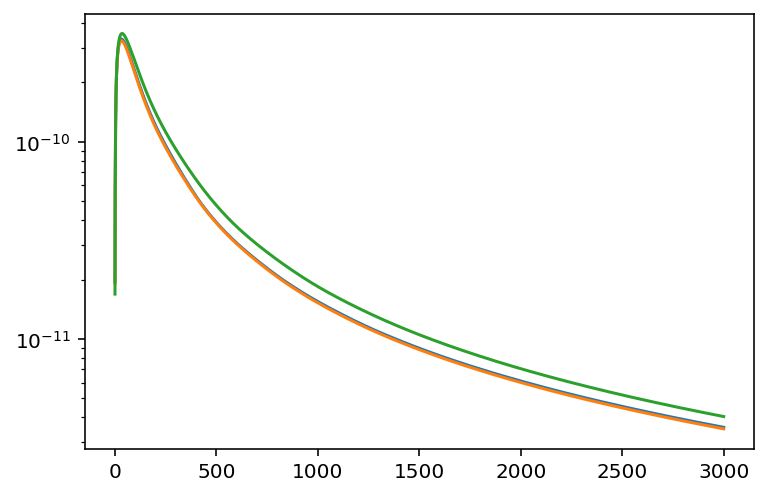

In [39]:
plt.plot(abs(der))
plt.semilogy(abs(der1))
plt.semilogy(abs(der2))

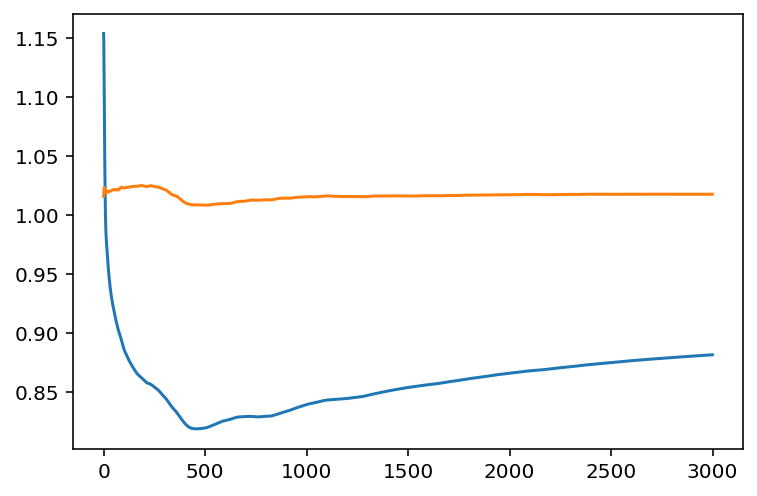

In [41]:
plt.plot(abs(der)/abs(der2))
plt.plot(abs(der)/abs(der1))